In [1]:
#import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/house_data - house_data.csv.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.duplicated().sum()

0

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


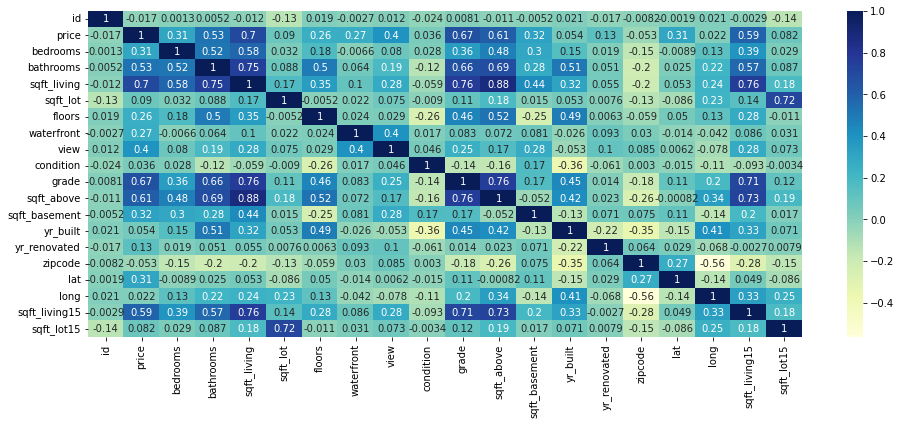

In [37]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
df_waterfront = df[df['waterfront'] != 0]
df_waterfront

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,20150311T000000,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
230,8096000060,20150413T000000,655000.0,2,1.75,1450,15798,2.0,1,4,...,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
246,2025069065,20140929T000000,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
264,2123039032,20141027T000000,369900.0,1,0.75,760,10079,1.0,1,4,...,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
300,3225069065,20140624T000000,3080000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,2025069140,20150317T000000,1900000.0,3,2.50,2830,4334,3.0,1,4,...,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20325,518500480,20140811T000000,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20767,8043700105,20150417T000000,2300000.0,4,4.00,4360,8175,2.5,1,4,...,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525
21201,518500460,20141008T000000,2230000.0,3,3.50,3760,5634,2.0,1,4,...,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762


In [10]:
df_2 = df.drop(["id", "zipcode", "date"], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [11]:
X = df_2.drop("price", axis=1).values
y = df_2['price'].values
X.shape

(21613, 17)

In [12]:
y.shape

(21613,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test) 

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
linreg.fit(rescaledX_train, y_train)

LinearRegression()

In [16]:
linreg.coef_

array([-1.08130248e+06,  3.31781748e+05, -1.32817468e+17,  1.07039458e+05,
       -9.77288844e+02,  5.50831618e+05,  2.07826123e+05,  1.09580997e+05,
        1.15310028e+06,  9.67896001e+16,  5.44370913e+16, -2.81191620e+05,
        4.80450338e+04,  3.43782821e+05, -1.23809290e+05,  1.25187407e+05,
       -2.92447262e+05])

In [39]:
y_pred_linear = linreg.predict(rescaledX_test)
y_pred_linear

array([ 463790.46772155,  773130.48661375, 1217419.63815131, ...,
        384776.80858463,  809728.67716925,  568799.19051679])

In [18]:
linreg.score(rescaledX_test, y_test)

0.6945371403553127

In [40]:
from sklearn.metrics import mean_squared_error, accuracy_score
MSE = mean_squared_error(y_test, y_pred_linear)
RMSE = np.sqrt(MSE)
RMSE

210132.4518910568

In [21]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(rescaledX_train, y_train)


SGDRegressor()

In [41]:
y_pred_sgd = sgd.predict(rescaledX_test)
sgd.score(rescaledX_test, y_test)

0.6912461224630337

In [42]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
rmse

211261.38939883548

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(rescaledX_train, y_train)

Ridge()

In [43]:
y_pred_ridge = ridge.predict(rescaledX_test)

In [26]:
ridge.score(rescaledX_test, y_test)

0.6942224403985441

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse

210240.66742055662

In [28]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_split=10)
reg.fit(rescaledX_train, y_train)

DecisionTreeRegressor(min_samples_split=10)

In [45]:
y_pred_tree = reg.predict(rescaledX_test)

In [30]:
reg.score(rescaledX_test, y_test)

0.7582830922379938

In [46]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
rmse

186925.0202349739

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, max_depth=20, random_state=0)
rfr.fit(rescaledX_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=0)

In [47]:
y_pred_forest = rfr.predict(rescaledX_test)

In [34]:
rfr.score(rescaledX_test, y_test)

0.855974281892224

In [48]:
mse = mean_squared_error(y_test, y_pred_forest)
rmse = np.sqrt(mse)
rmse

144289.2400619264